# Pandas Lab Assignment - Diamonds

The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension<br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

In [1]:
import pandas as pd
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Drop the unnamed column from the dataset once you read it

In [2]:
df1=df.drop('Unnamed: 0',axis=1,inplace=False)
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## The occurences of all unique colors of diamonds, bar chart of the same.

In [3]:
dfcolor=df1['color'].value_counts()
print(dfcolor)
dfcolor.plot(kind='bar')
#df['color'].value_counts().plot(kind='bar')

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


## Average price of each cut of diamond.

In [4]:
df1['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [5]:
dfpricecut=df1[['cut','price']]
for name,values in dfpricecut.groupby(['cut']):
    print('The Average price of',name,'cut is:',values['price'].mean())


The Average price of Fair cut is: 4358.757763975155
The Average price of Good cut is: 3928.864451691806
The Average price of Ideal cut is: 3457.541970210199
The Average price of Premium cut is: 4584.2577042999055
The Average price of Very Good cut is: 3981.7598907465654


In [6]:
dfpricecut=df1[['cut','price']]
dfpricecut.head()


,cut,price
0,Ideal,326
1,Premium,326
2,Good,327
3,Premium,334
4,Good,335


## Find the volume of every diamond and store it in a new column in the dataset. (volume = xyz)

In [7]:
df1['volume']=df1['x']*df1['y']*df1['z']
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


## Histograms of Price and depths colums as two separate plots

Text(0.5, 1.0, 'HISTOGRAM OF Depth')

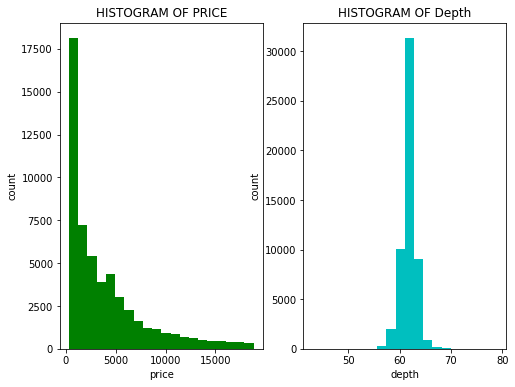

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.hist(df1['price'],bins=20,color='g')
plt.xlabel('price')
plt.ylabel('count')
plt.title('HISTOGRAM OF PRICE')

plt.subplot(1,2,2)
plt.hist(df1['depth'],bins=20,color='c')
plt.xlabel('depth')
plt.ylabel('count')
plt.title('HISTOGRAM OF Depth')

## A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3

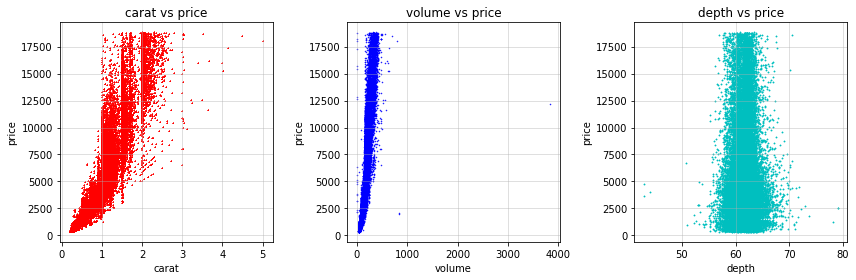

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(df1['carat'],df1['price'],color='r',s=1,marker='+')
plt.grid(alpha=0.5)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('carat vs price')


plt.subplot(1,3,2)
plt.xlabel('volume')
plt.ylabel('price')
plt.scatter(df1['volume'],df1['price'],color='b',s=1,marker='.')
plt.grid(alpha=0.5)
plt.title('volume vs price')

plt.subplot(1,3,3)
plt.scatter(df1['depth'],df1['price'],color='c',s=1,marker='*')
plt.grid(alpha=0.5)
plt.xlabel('depth')
plt.ylabel('price')
plt.title('depth vs price')
plt.tight_layout()

## Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only

In [10]:
df3=df['color']
df3.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
mapping={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
df1['color number']=df['color'].apply(lambda x:mapping[x])

In [12]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,color number
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,6


## Which clarity(i.e the category) diamond has maximum mean depth?

In [17]:
df1clarity=df1[['clarity','depth']]

In [37]:
list1=[]
for name,value in df1clarity.groupby('clarity'):
    list1.append(value['depth'].mean())
print(list1)   
list1.sort(reverse=True)
print('The maximum mean is:',list1[0])

[62.73427800269906, 61.510614525139665, 61.853042479908154, 61.77216663041114, 61.66745808346592, 61.724416707456356, 61.6246511627907, 61.663778128701146]
The maximum mean is: 62.73427800269906


## Find the diamond(i.e row) with minimum price per volume

In [38]:
df1['ppv']=df1['price']/df1['volume']

In [82]:
df2=df1['ppv'].min()
minim=df2

minim

2.34942678756793

In [46]:
df9=df1[['ppv']]

In [ ]:
#df9

In [64]:
list2=list(df9['ppv'])

In [68]:
for i in range(len(list2)):
    if list2[i]==2.34942678756793:
        index=i

In [69]:
index

48410

In [71]:
df33=df1.iloc[48410]

In [76]:
df33=pd.DataFrame(data=df33)

In [77]:
df33

,48410
carat,0.51
cut,Very Good
color,E
clarity,VS1
depth,61.8
table,54.7
price,1970
x,5.12
y,5.15
z,31.8


In [83]:
### sorted answer

print(df1['ppv'].min())
df1[df1['ppv']==minim]

2.34942678756793


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,color number,ppv
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,838.5024,1,2.349427


In [85]:
df1[df1['ppv']==minim]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,color number,ppv
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,838.5024,1,2.349427
